In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Reading Data

In [ ]:
df=pd.read_csv('accdata.csv')
df.tail()

Data Preprosasing 

In [87]:
# Checikng any missing values are presend in the dataset or not :: 
df.isnull().sum()

Date       0
Time       0
accel_x    0
accel_y    0
accel_z    0
dtype: int64

In [88]:
# Marge Date and time column togethere and create another column Date_Time
# combine date and time into Date-Time Column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
# Now drop the Date and Time column
df = df.drop(columns=['Date', 'Time'])


In [89]:
df.head()

,accel_x,accel_y,accel_z,Datetime
0,-1.838747,3.543418,9.126697,2022-09-03 23:35:16
1,1.110910,1.810017,9.634268,2022-09-03 23:35:31
2,8.829816,0.833182,4.663905,2022-09-03 23:35:47
3,-0.852336,-0.124498,9.787497,2022-09-03 23:36:52
4,-0.900220,-0.095768,9.835381,2022-09-03 23:37:44


Data Visulization

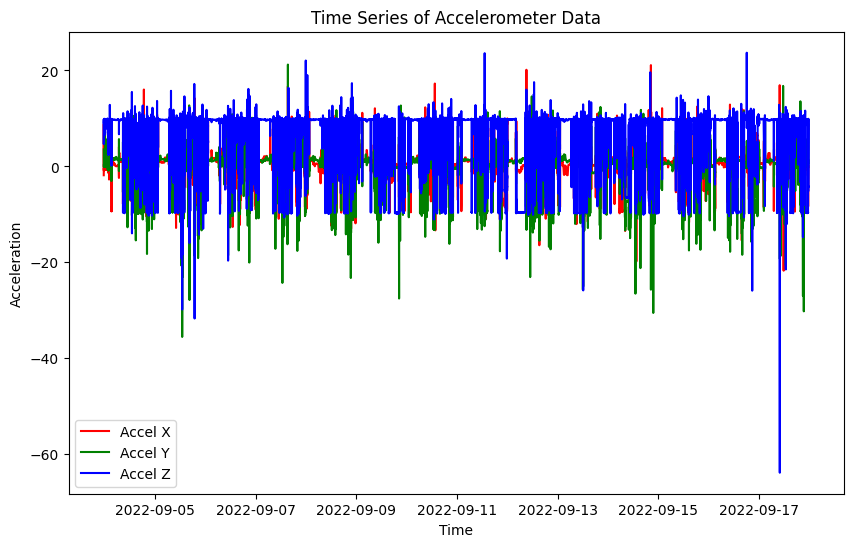

In [90]:
plt.figure(figsize=(10, 6))

sns.lineplot(x='Datetime', y='accel_x', data=df, label='Accel X', color='red')
sns.lineplot(x='Datetime', y='accel_y', data=df, label='Accel Y', color='green')
sns.lineplot(x='Datetime', y='accel_z', data=df, label='Accel Z', color='blue')
plt.title('Time Series of Accelerometer Data')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.legend()


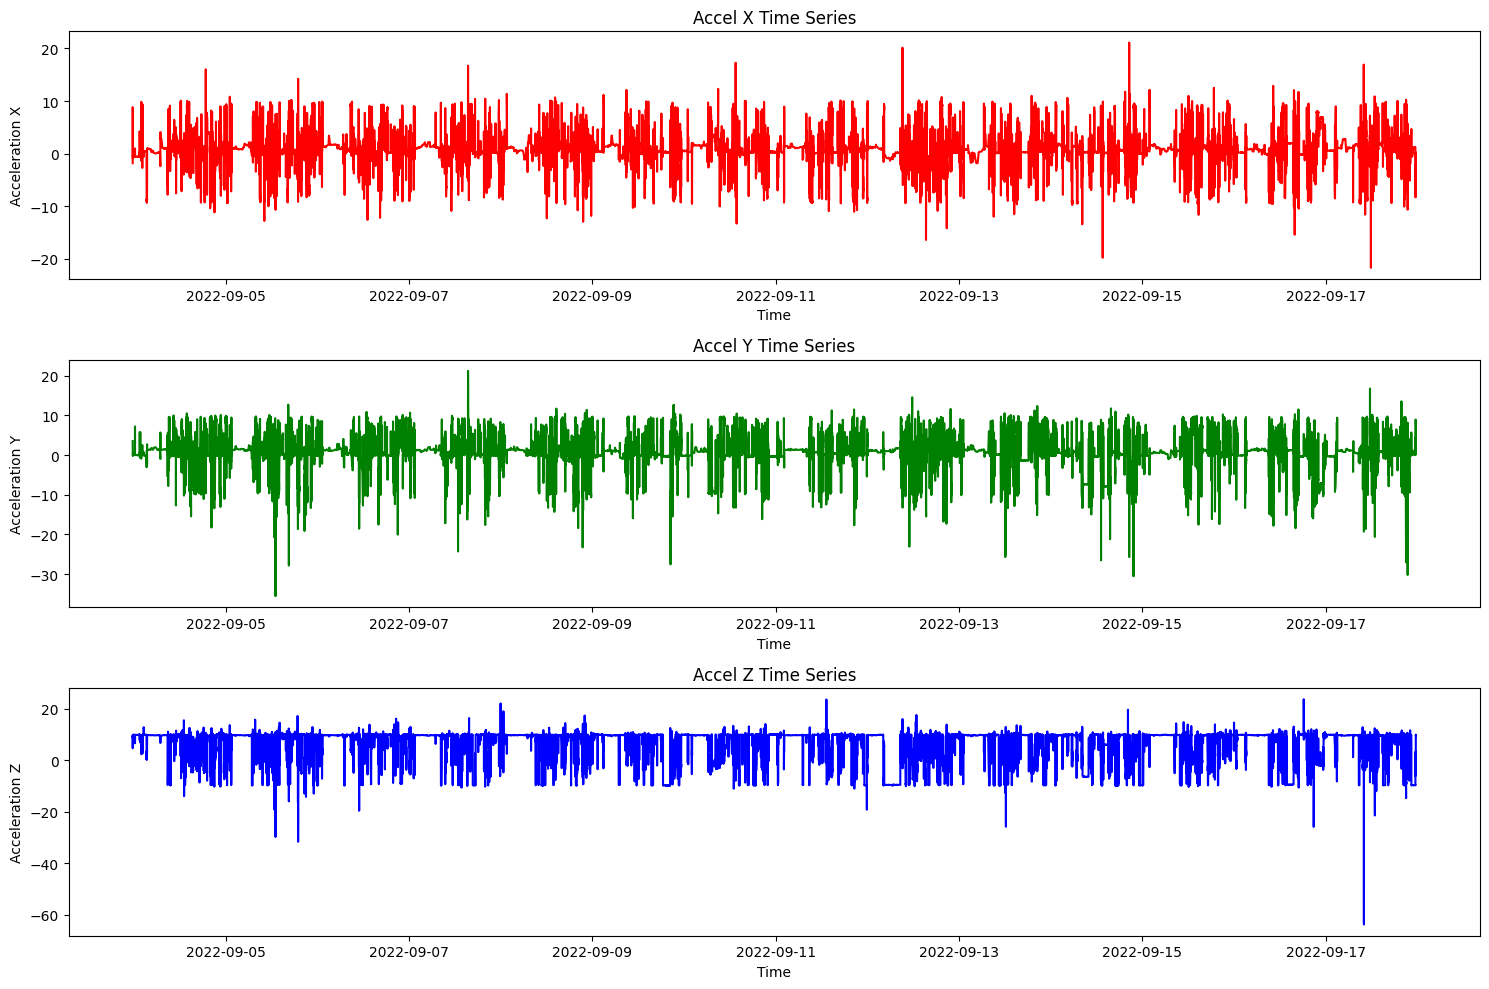

In [91]:
plt.figure(figsize=(15, 10))

# Plot Accel X
plt.subplot(3, 1, 1)
sns.lineplot(x='Datetime', y='accel_x', data=df, color='red')
plt.title('Accel X Time Series')
plt.xlabel('Time')
plt.ylabel('Acceleration X')

# Plot Accel Y
plt.subplot(3, 1, 2)
sns.lineplot(x='Datetime', y='accel_y', data=df, color='green')
plt.title('Accel Y Time Series')
plt.xlabel('Time')
plt.ylabel('Acceleration Y')

# Plot Accel Z
plt.subplot(3, 1, 3)
sns.lineplot(x='Datetime', y='accel_z', data=df, color='blue')
plt.title('Accel Z Time Series')
plt.xlabel('Time')
plt.ylabel('Acceleration Z')

plt.tight_layout()
plt.show()


In [92]:
mean_x, std_x = np.mean(df['accel_x']), np.std(df['accel_x'])
mean_y, std_y = np.mean(df['accel_y']), np.std(df['accel_y'])
mean_z, std_z = np.mean(df['accel_z']), np.std(df['accel_z'])

# Define a threshold
threshold = 2

In [93]:
mean_x, std_x 

(np.float64(0.78085709478614), np.float64(3.3714871129656583))

In [94]:
# Calculate deviations from the mean
deviation_x = np.abs(df['accel_x'] - mean_x)
deviation_y = np.abs(df['accel_y'] - mean_y)
deviation_z = np.abs(df['accel_z'] - mean_z)

# Threshold values
threshold_x = threshold * std_x
threshold_y = threshold * std_y
threshold_z = threshold * std_z

# Identify noisy points
noise_x = deviation_x > threshold_x
noise_y = deviation_y > threshold_y
noise_z = deviation_z > threshold_z

# Combine noise indicators
df['noise_x'] = noise_x
df['noise_y'] = noise_y
df['noise_z'] = noise_z



In [95]:
threshold_x

np.float64(6.742974225931317)

In [96]:
deviation_x

0        2.619604
1        0.330052
2        8.048959
3        1.633193
4        1.681077
           ...   
27932    4.487081
27933    1.077738
27934    1.566155
27935    0.551014
27936    0.914932
Name: accel_x, Length: 27937, dtype: float64

In [97]:
threshold_x,

(np.float64(6.742974225931317),)

In [98]:
threshold_y

np.float64(9.537276718334601)

In [99]:
threshold_z

np.float64(11.219263218927752)

In [100]:
noisy_points = df[df['noise_x'] | df['noise_y'] | df['noise_z']]

if not noisy_points.empty:
    print("Noisy Points:")
    print(noisy_points)
else:
    print("No noisy points found.")

Noisy Points:
        accel_x   accel_y   accel_z            Datetime  noise_x  noise_y  \
2      8.829816  0.833182  4.663905 2022-09-03 23:35:47     True    False   
98     8.791509 -0.114922  5.717354 2022-09-04 01:50:16     True    False   
99     8.973468 -0.220267  4.185065 2022-09-04 01:50:31     True    False   
100    9.854534 -0.708684  2.365471 2022-09-04 01:50:46     True    False   
101    9.356541 -0.086191  3.801992 2022-09-04 01:51:01     True    False   
...         ...       ...       ...                 ...      ...      ...   
27922 -7.211336  1.369483 -6.119579 2022-09-17 23:31:30     True    False   
27923 -7.527370  0.919373 -5.535394 2022-09-17 23:31:45     True    False   
27924 -8.303091  0.067038 -4.568137 2022-09-17 23:32:01     True    False   
27925 -8.341399  0.172383 -4.424485 2022-09-17 23:32:16     True    False   
27926 -8.312668  0.383072 -4.434062 2022-09-17 23:32:45     True    False   

       noise_z  
2        False  
98       False  
99       F

In [105]:
def moving_average(data, window_size):
    return pd.Series(data).rolling(window=window_size).mean()
window_size = 5
df['smoothed_x'] = moving_average(df['accel_x'], window_size)
df['smoothed_x']

0             NaN
1             NaN
2             NaN
3             NaN
4        1.269885
           ...   
27932   -3.346136
27933   -2.681506
27934   -2.076252
27935   -1.340753
27936   -0.938527
Name: smoothed_x, Length: 27937, dtype: float64

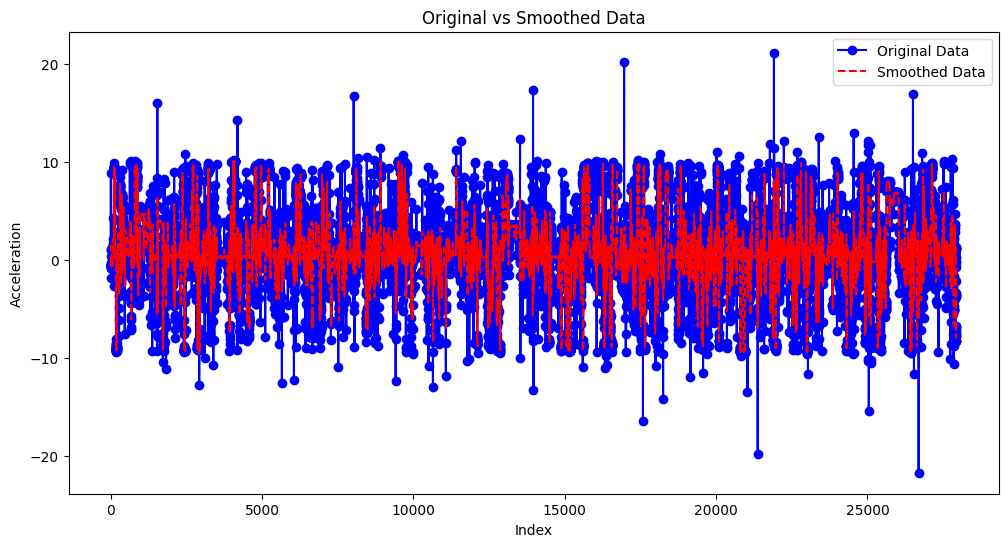

In [106]:
plt.figure(figsize=(12, 6))

plt.plot(df['accel_x'], label='Original Data', color='blue', marker='o')

plt.plot(df['smoothed_x'], label='Smoothed Data', color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Acceleration')
plt.title('Original vs Smoothed Data')
plt.legend()